In [ ]:
!pip install lightgbm
!pip install catboost

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC, LinearSVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.callbacks import EarlyStopping
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [ ]:
file_path='/content/drive/MyDrive/Final year - Capstone Projects/combined_filtered_data.csv'
data=pd.read_csv(file_path, delimiter=';', encoding='utf-8', on_bad_lines='skip')
print("File loaded successfully!")

File loaded successfully!


In [ ]:
data.columns

Index(['time_stamp', 'asset_id', 'status_type_id', 'sensor_0_avg',
       'sensor_1_avg', 'sensor_2_avg', 'wind_speed_3_avg', 'wind_speed_4_avg',
       'wind_speed_3_max', 'wind_speed_3_min', 'wind_speed_3_std',
       'sensor_5_avg', 'sensor_5_max', 'sensor_5_min', 'sensor_5_std',
       'sensor_6_avg', 'sensor_7_avg', 'sensor_8_avg', 'sensor_9_avg',
       'sensor_10_avg', 'sensor_11_avg', 'sensor_12_avg', 'sensor_13_avg',
       'sensor_14_avg', 'sensor_15_avg', 'sensor_16_avg', 'sensor_17_avg',
       'sensor_18_avg', 'sensor_18_max', 'sensor_18_min', 'sensor_18_std',
       'sensor_19_avg', 'sensor_20_avg', 'sensor_21_avg', 'sensor_22_avg',
       'sensor_23_avg', 'sensor_24_avg', 'sensor_25_avg', 'sensor_26_avg',
       'reactive_power_27_avg', 'reactive_power_27_max',
       'reactive_power_27_min', 'reactive_power_27_std',
       'reactive_power_28_avg', 'reactive_power_28_max',
       'reactive_power_28_min', 'reactive_power_28_std', 'power_29_avg',
       'power_29_max', 'po

In [ ]:
#Renaming the columns
rename_mapping = {
    'time_stamp': 'time_stamp',
    'asset_id': 'asset_id',
    'id': 'id',
    'train_test': 'train_test',
    'status_type_id': 'status_type_id',
    'sensor_0_avg': 'Ambient temperature avg',
    'sensor_1_avg': 'Wind absolute direction avg',
    'sensor_2_avg': 'Wind relative direction avg',
    'wind_speed_3_avg': 'Windspeed avg',
    'wind_speed_4_avg': 'Estimated windspeed avg',
    'wind_speed_3_max': 'Windspeed max',
    'wind_speed_3_min': 'Windspeed min',
    'wind_speed_3_std': 'Windspeed std',
    'sensor_5_avg': 'Pitch angle avg',
    'sensor_5_max': 'Pitch angle max',
    'sensor_5_min': 'Pitch angle min',
    'sensor_5_std': 'Pitch angle std',
    'sensor_6_avg': 'Hub controller temperature avg',
    'sensor_7_avg': 'Top nacelle controller temperature avg',
    'sensor_8_avg': 'Choke coils on the VCS- section temperature avg',
    'sensor_9_avg': 'VCP-board temperature avg',
    'sensor_10_avg': 'VCS cooling water temperature avg',
    'sensor_11_avg': 'Gearbox bearing on high speed shaft  temperature avg',
    'sensor_12_avg': 'Gearbox oil temperature avg',
    'sensor_13_avg': 'Generator bearing 2(Drive end)  temperature avg',
    'sensor_14_avg': 'Generator bearing 1(Non-drive end) temperature avg',
    'sensor_15_avg': 'Generator stator winding phase 1 temperature avg',
    'sensor_16_avg': 'Generator stator winding phase 2 temperature avg',
    'sensor_17_avg': 'Generator stator winding phase 3 temperature avg',
    'sensor_18_avg': 'Generator rpm avg',
    'sensor_18_max': 'Generator rpm max',
    'sensor_18_min': 'Generator rpm min',
    'sensor_18_std': 'Generator rpm std',
    'sensor_19_avg': 'Split ring chamber temperature avg',
    'sensor_20_avg': 'Busbar section temperature avg',
    'sensor_21_avg': 'IGBT-driver on grid side inverter temperature avg',
    'sensor_22_avg': 'Actual Phase displacement avg',
    'sensor_23_avg': 'Averaged current phase 1',
    'sensor_24_avg': 'Averaged current phase 2',
    'sensor_25_avg': 'Averaged current phase 3',
    'sensor_26_avg': 'Grid frequency',
    'reactive_power_27_avg': 'Possible Grid capacitive reactive power avg',
    'reactive_power_27_max': 'Possible Grid capacitive reactive power max',
    'reactive_power_27_min': 'Possible Grid capacitive reactive power min',
    'reactive_power_27_std': 'Possible Grid capacitive reactive power std',
    'reactive_power_28_avg': 'Possible Grid inductive reactive power avg',
    'reactive_power_28_max': 'Possible Grid inductive reactive power max',
    'reactive_power_28_min': 'Possible Grid inductive reactive power min',
    'reactive_power_28_std': 'Possible Grid inductive reactive power std',
    'power_29_avg': 'Possible Grid active power avg',
    'power_29_max': 'Possible Grid active power max',
    'power_29_min': 'Possible Grid active power min',
    'power_29_std': 'Possible Grid active power std',
    'power_30_avg': 'Grid power avg',
    'power_30_max': 'Grid power max',
    'power_30_min': 'Grid power min',
    'power_30_std': 'Grid power std',
    'sensor_31_avg': 'Grid reactive power avg',
    'sensor_31_max': 'Grid reactive power max',
    'sensor_31_min': 'Grid reactive power min',
    'sensor_31_std': 'Grid reactive power std',
    'sensor_32_avg': 'Averaged voltage phase 1',
    'sensor_33_avg': 'Averaged voltage phase 2',
    'sensor_34_avg': 'Averaged voltage phase 3',
    'sensor_35_avg': 'IGBT-driver on rotor side inverter phase 1 temperature avg',
    'sensor_36_avg': 'IGBT-driver on rotor side inverter phase 2 temperature avg',
    'sensor_37_avg': 'IGBT-driver on rotor side inverter phase 3 temperature avg',
    'sensor_38_avg': 'HV transformer phase L1 temperature avg',
    'sensor_39_avg': 'HV transformer phase L2 temperature avg',
    'sensor_40_avg': 'HV transformer phase L3 temperature avg',
    'sensor_41_avg': 'Hydraulic group oil temperature avg',
    'sensor_42_avg': 'Nacelle direction avg',
    'sensor_43_avg': 'Nacelle temperature avg',
    'sensor_44': 'Generator disconnected active power avg',
    'sensor_45': 'Generator connected in delta active power avg',
    'sensor_46': 'Generator connected in star active power avg',
    'sensor_47': 'Generator disconnected reactive power avg',
    'sensor_48': 'Generator connected in delta reactive power avg',
    'sensor_49': 'Generator connected in star reactive power avg',
    'sensor_50': 'Total active power avg',
    'sensor_51': 'Total reactive power avg',
    'sensor_52_avg': 'Rotor rpm avg',
    'sensor_52_max': 'Rotor rpm max',
    'sensor_52_min': 'Rotor rpm min',
    'sensor_52_std': 'Rotor rpm std',
    'sensor_53_avg': 'Nose cone temperature avg',
}

# Rename the columns in the DataFrame
data.rename(columns=rename_mapping, inplace=True)
# Convert time to python date time format
data['time_stamp']=pd.to_datetime(data['time_stamp'])
#Converting object dtypes to strings
data=data.astype({col: 'string' for col in data.select_dtypes(include='object').columns})

In [ ]:
input_data = data.drop(['time_stamp'], axis=1)

In [ ]:
#Handling missing values
input_data=input_data.dropna()
data=data.dropna()
missing_data=data.isnull().sum()
missing_values=input_data.isnull().sum()
print("Missing values: \n", missing_data[missing_data>0])
print("Missing values: \n", missing_values[missing_values>0])

Missing values: 
 Series([], dtype: int64)
Missing values: 
 Series([], dtype: int64)


In [ ]:
print(input_data['event_description'].value_counts())

event_description
Normal                       17826
Generator bearing failure     6517
Hydraulic group               6042
 Normal                       2017
Transformer failure           2014
Gearbox failure               1990
 Normal                       1847
Name: count, dtype: Int64


In [ ]:
print(input_data['event_description'].unique())

<StringArray>
['Generator bearing failure',           'Gearbox failure',
                    'Normal',           'Hydraulic group',
                  ' Normal ',       'Transformer failure',
                   ' Normal']
Length: 7, dtype: string


In [ ]:
input_data['event_description'] = input_data['event_description'].str.strip().map({
    'Normal': 0,
    'Generator bearing failure': 1,
    'Hydraulic group': 2,
    'Transformer failure': 3,
    'Gearbox failure': 4
})

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Features & Target
X = input_data.drop(columns=["event_description"], errors="ignore")
y = input_data["event_description"]

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4288
           1       0.99      0.99      0.99      1356
           2       0.99      0.96      0.98      1210
           3       0.98      0.94      0.96       416
           4       0.50      0.51      0.50       381

    accuracy                           0.94      7651
   macro avg       0.88      0.87      0.88      7651
weighted avg       0.94      0.94      0.94      7651



In [ ]:
input_data['event_description'].value_counts()

,count
event_description,
0,21690
1,6517
2,6042
3,2014
4,1990


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Define SMOTE with custom sampling strategy for class 3 and class 4
smote = SMOTE(sampling_strategy={3: 4800, 4: 4800}, random_state=42)

# Apply SMOTE on training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print new class distribution
print("New class distribution:", Counter(y_resampled))

New class distribution: Counter({0: 17402, 1: 5161, 2: 4832, 4: 4800, 3: 4800})


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Naive Bayes Accuracy: 0.5604496144294864
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.72      4288
           1       0.00      0.00      0.00      1356
           2       0.00      0.00      0.00      1210
           3       0.00      0.00      0.00       416
           4       0.00      0.00      0.00       381

    accuracy                           0.56      7651
   macro avg       0.11      0.20      0.14      7651
weighted avg       0.31      0.56      0.40      7651



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted s

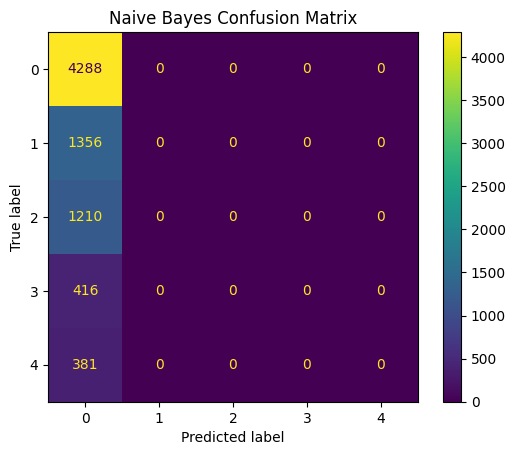

Decision Tree Accuracy: 0.9104692197098418
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      4288
           1       0.96      0.97      0.96      1356
           2       0.93      0.93      0.93      1210
           3       0.94      0.95      0.94       416
           4       0.44      0.49      0.46       381

    accuracy                           0.91      7651
   macro avg       0.84      0.85      0.84      7651
weighted avg       0.91      0.91      0.91      7651



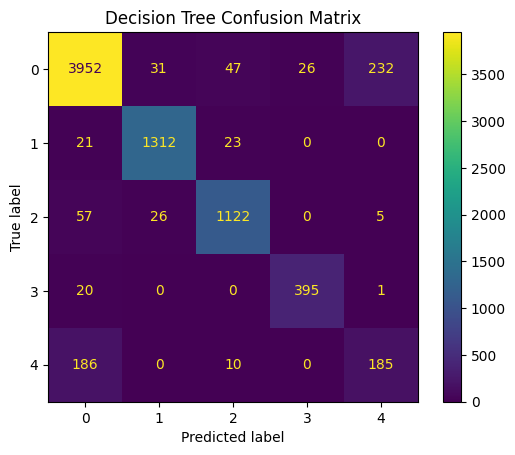

XGBoost Accuracy: 0.8994902627107567
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      4288
           1       0.96      0.93      0.94      1356
           2       0.93      0.82      0.87      1210
           3       0.86      0.93      0.89       416
           4       0.51      0.77      0.61       381

    accuracy                           0.90      7651
   macro avg       0.84      0.87      0.85      7651
weighted avg       0.91      0.90      0.90      7651



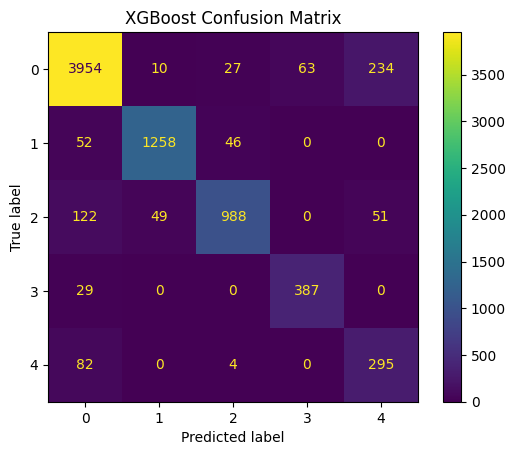

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19686
[LightGBM] [Info] Number of data points in the train set: 36995, number of used features: 81
[LightGBM] [Info] Start training from score -0.754198
[LightGBM] [Info] Start training from score -1.969652
[LightGBM] [Info] Start training from score -2.035522
[LightGBM] [Info] Start training from score -2.042167
[LightGBM] [Info] Start training from score -2.042167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

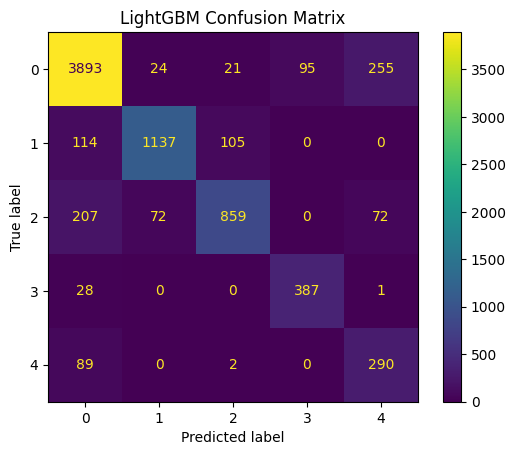

In [ ]:
# Step 7: Train a Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

nb_model = GaussianNB()
nb_model.fit(X_resampled, y_resampled)

# Step 8: Make predictions
y_pred_nb = nb_model.predict(X_test_scaled)

# Step 9: Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(cm_nb).plot()
plt.title("Naive Bayes Confusion Matrix")
plt.show()


# Step 7: Train a Decision Tree model
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_resampled, y_resampled)

# Step 8: Make predictions
y_pred_dt = dt_model.predict(X_test)

# Step 9: Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_dt).plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()


# Step 7: Train an XGBoost model
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=3, n_estimators=50, random_state=42)
xgb_model.fit(X_resampled, y_resampled)

# Step 8: Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Step 9: Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(cm_xgb).plot()
plt.title("XGBoost Confusion Matrix")
plt.show()


# Step 7: Train a LightGBM model
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(max_depth=3, n_estimators=50, random_state=42)
lgbm_model.fit(X_resampled, y_resampled)

# Step 8: Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Step 9: Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Accuracy: {accuracy_lgbm}")
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgbm))

# Confusion Matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
ConfusionMatrixDisplay(cm_lgbm).plot()
plt.title("LightGBM Confusion Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.559665403215266
Logistic Regression Accuracy: 0.8581884720951509
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      4288
           1       0.92      0.84      0.88      1356
           2       0.87      0.71      0.78      1210
           3       0.80      0.93      0.86       416
           4       0.47      0.76      0.58       381

    accuracy                           0.86      7651
   macro avg       0.79      0.83      0.80      7651
weighted avg       0.87      0.86      0.86      7651



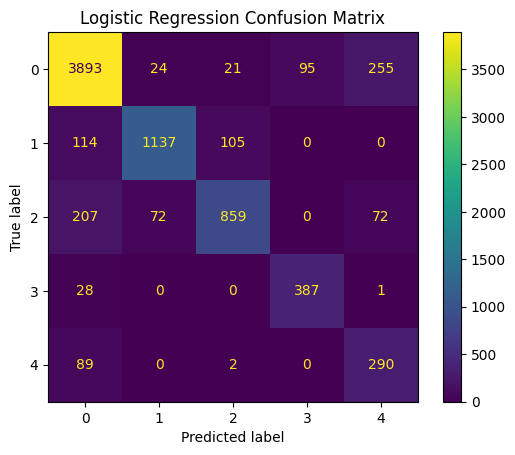

In [ ]:
# Step 7: Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

# Step 8: Make predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Step 9: Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Logistic Regression Accuracy: {accuracy_lgbm}")
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lgbm))

# Confusion Matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
ConfusionMatrixDisplay(cm_lgbm).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [ ]:
# Step 6: Import necessary libraries for LSTM and XGBoost
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
import xgboost as xgb
import numpy as np
from sklearn.metrics import classification_report

# Step 7: Reshape data for LSTM input
# LSTM requires 3D input: (samples, time_steps, features)
time_steps = 1  # Treat each feature as a time step
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], time_steps, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], time_steps, X_test_scaled.shape[1])

# Step 8: Build the LSTM feature extractor
lstm_model = Sequential()
lstm_model.add(Input(shape=(time_steps, X_train_scaled.shape[1])))  # Input layer
lstm_model.add(LSTM(64, activation='relu', return_sequences=False))  # LSTM layer
lstm_model.add(Dense(32, activation='relu'))  # Dense layer for feature extraction

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=30, batch_size=64, validation_split=0.1, verbose=1)

# Step 9: Extract features using the trained LSTM
train_lstm_features = lstm_model.predict(X_train_lstm)
test_lstm_features = lstm_model.predict(X_test_lstm)

# Step 10: Concatenate LSTM features with original features
X_train_combined = np.hstack([X_train_scaled, train_lstm_features])
X_test_combined = np.hstack([X_test_scaled, test_lstm_features])

# Step 11: Train an XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train)),
    eval_metric='mlogloss',
    use_label_encoder=False
)
xgb_model.fit(X_train_combined, y_train)

# Step 12: Evaluate the XGBoost model
y_pred = xgb_model.predict(X_test_combined)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Epoch 1/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5478 - loss: 1.9925 - val_accuracy: 0.7295 - val_loss: 0.8298
Epoch 2/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7455 - loss: 0.7157 - val_accuracy: 0.6952 - val_loss: 0.7791
Epoch 3/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7336 - loss: 0.6965 - val_accuracy: 0.8079 - val_loss: 0.6013
Epoch 4/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7598 - loss: 1.1382 - val_accuracy: 0.6419 - val_loss: 2.1318
Epoch 5/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6420 - loss: 2.1891 - val_accuracy: 0.6168 - val_loss: 2.2410
Epoch 6/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6229 - loss: 2.3419 - val_accuracy: 0.6083 - val_loss: 2.3308
Epoch 7/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6197 - loss: 2.4229 - val_accuracy: 0.6171 - val_loss: 2.3942
Epoch 8/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6198 - loss: 2.4644 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:11:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      4288
           1       0.99      0.99      0.99      1356
           2       0.99      0.98      0.99      1210
           3       1.00      1.00      1.00       416
           4       0.50      0.53      0.52       381

    accuracy                           0.95      7651
   macro avg       0.89      0.89      0.89      7651
weighted avg       0.95      0.95      0.95      7651



Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


766/766 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6160 - loss: 1.0041 - val_accuracy: 0.7992 - val_loss: 0.5343
Epoch 2/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8027 - loss: 0.5132 - val_accuracy: 0.8479 - val_loss: 0.4018
Epoch 3/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8439 - loss: 0.4050 - val_accuracy: 0.8652 - val_loss: 0.3416
Epoch 4/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8586 - loss: 0.3621 - val_accuracy: 0.8763 - val_loss: 0.3065
Epoch 5/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8682 - loss: 0.3256 - val_accuracy: 0.8817 - val_loss: 0.2894
Epoch 6/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8807 - loss: 0.2921 - val_accuracy: 0.8860 - val_loss: 0.2702
Epoch 7/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8846 - loss: 0.2843 - val_accuracy: 0.8971 - val_loss: 0.2508
Epoch 8/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8891 - loss: 0.2652 - val_accuracy: 0.9005 - val_

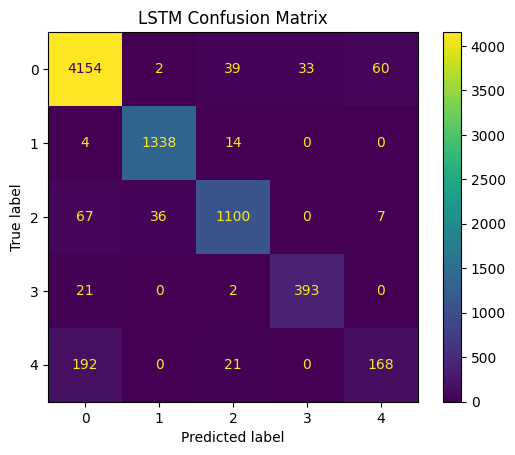

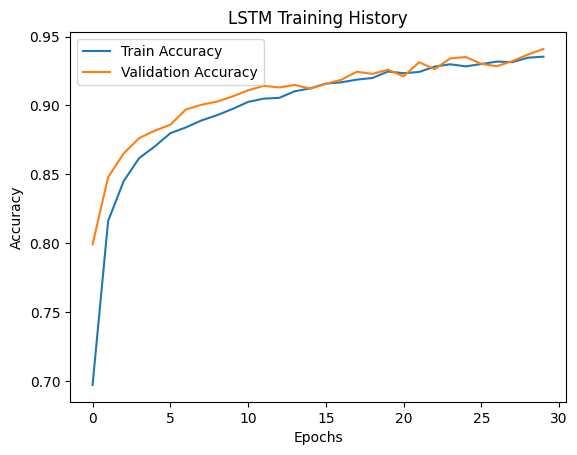

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Reshape the data for LSTM
# LSTM expects 3D input: (samples, timesteps, features)
timesteps = 1  # Each sample is treated as a single timestep
num_features = X_train_scaled.shape[1]

X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], timesteps, num_features)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], timesteps, num_features)

# Step 2: Convert target to categorical if multi-class classification
num_classes = len(np.unique(y_train))  # Number of unique classes in the target
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Step 3: Build the LSTM model
lstm_model = Sequential()

# LSTM Layer
lstm_model.add(LSTM(50, input_shape=(timesteps, num_features), return_sequences=False))

# Dropout to prevent overfitting
lstm_model.add(Dropout(0.2))

# Dense output layer with softmax for multi-class classification
lstm_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = lstm_model.fit(
    X_train_reshaped,
    y_train_categorical,
    epochs=30,  # Adjust epochs based on dataset size and performance
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Step 5: Evaluate the model
y_pred_proba = lstm_model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class predictions

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred)
print(f"LSTM Accuracy: {accuracy}")
print("LSTM Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("LSTM Confusion Matrix")
plt.show()

# Step 6: Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Training History')
plt.show()

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


957/957 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2599 - loss: -183.2470 - val_accuracy: 0.3094 - val_loss: -3204.6194
Epoch 2/30
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3303 - loss: -6519.4658 - val_accuracy: 0.3449 - val_loss: -22723.9609
Epoch 3/30
957/957 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3508 - loss: -32724.0273 - val_accuracy: 0.3338 - val_loss: -66771.0547
Epoch 4/30
957/957 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3484 - loss: -81397.8984 - val_accuracy: 0.3400 - val_loss: -139406.5625
Epoch 5/30
957/957 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3458 - loss: -160996.2969 - val_accuracy: 0.3415 - val_loss: -242740.0781
Epoch 6/30
957/957 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3362 - loss: -282168.7188 - val_accuracy: 0.3398 - val_loss: -380549.9688
Epoch 7/30
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3381 - loss: -430591.8750 - val_accuracy: 0.3453 - val_loss: -555800.5000
Epoch 8/30
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


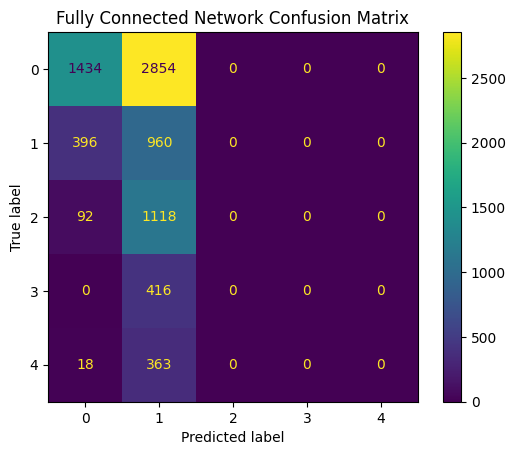

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X and y are your features and labels (replace with your actual dataset)
# Example: X = np.random.rand(1000, 29)  # 1000 samples, 29 features per sample
# Example: y = np.random.randint(0, 2, size=1000)  # Binary labels

# Step 1: Split your dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Build the Fully Connected Neural Network model
fc_model = Sequential()

# Add an input layer (first hidden layer)
fc_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # 64 neurons

# Add another hidden layer
fc_model.add(Dense(32, activation='relu'))  # 32 neurons

# Add an output layer
fc_model.add(Dense(1, activation='sigmoid'))  # Binary classification (change activation if multiclass)

# Step 4: Compile the model
fc_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
fc_model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_data=(X_test_scaled, y_test))

# Step 6: Evaluate the model
y_pred_fc = fc_model.predict(X_test_scaled)
y_pred_fc = (y_pred_fc > 0.5).astype(int)  # Threshold to get binary predictions

# Accuracy and Classification Report
accuracy_fc = np.mean(y_pred_fc == y_test.values.reshape(-1, 1))  # Accuracy calculation
print(f"Fully Connected Network Accuracy: {accuracy_fc}")
print("Fully Connected Network Classification Report:\n", classification_report(y_test, y_pred_fc))

# Confusion Matrix
cm_fc = confusion_matrix(y_test, y_pred_fc)
ConfusionMatrixDisplay(cm_fc).plot()
plt.title("Fully Connected Network Confusion Matrix")
plt.show()

Epoch 1/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.6431 - loss: 0.9276 - val_accuracy: 0.8154 - val_loss: 0.4829
Epoch 2/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8169 - loss: 0.4709 - val_accuracy: 0.8569 - val_loss: 0.3617
Epoch 3/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8557 - loss: 0.3665 - val_accuracy: 0.8773 - val_loss: 0.3122
Epoch 4/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8759 - loss: 0.3148 - val_accuracy: 0.8855 - val_loss: 0.2831
Epoch 5/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8789 - loss: 0.2952 - val_accuracy: 0.8967 - val_loss: 0.2504
Epoch 6/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8917 - loss: 0.2671 - val_accuracy: 0.9023 - val_loss: 0.2411
Epoch 7/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8957 - loss: 0.2510 - val_accuracy: 0.9036 - val_loss: 0.2264
Epoch 8/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8985 - loss: 0.2403 - val_accuracy:

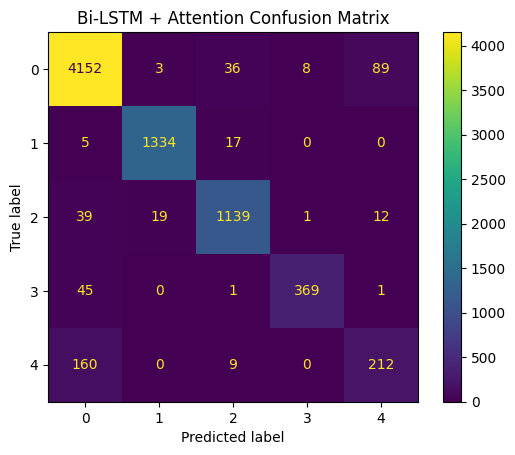

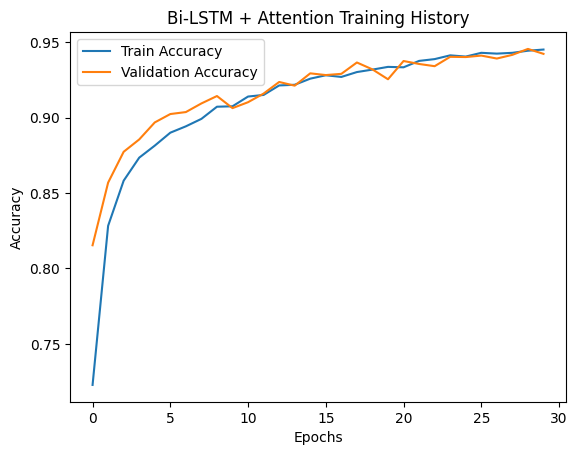

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Bidirectional, LSTM, Dropout, Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

# Attention Layer
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1],), initializer="zeros")
        super(Attention, self).build(input_shape)

    def call(self, x):
        score = K.squeeze(K.tanh(K.dot(x, self.W) + self.b), axis=-1)
        attention_weights = K.softmax(score)
        context_vector = K.sum(x * K.expand_dims(attention_weights, axis=-1), axis=1)
        return context_vector

# Reshape data for LSTM
timesteps = 1
num_features = X_train_scaled.shape[1]
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], timesteps, num_features)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], timesteps, num_features)

# Convert target to categorical
num_classes = len(np.unique(y_train))
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Model definition
input_layer = Input(shape=(timesteps, num_features))
x = Bidirectional(LSTM(64, return_sequences=True))(input_layer)
x = Attention()(x)
x = Dropout(0.3)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_reshaped,
    y_train_categorical,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
y_pred_proba = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_proba, axis=1)

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred)
print(f"Bi-LSTM + Attention Accuracy: {accuracy}")
print("Bi-LSTM + Attention Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Bi-LSTM + Attention Confusion Matrix")
plt.show()

# Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Bi-LSTM + Attention Training History')
plt.show()


Epoch 1/30
383/383 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6825 - loss: 0.8167 - val_accuracy: 0.8312 - val_loss: 0.4070
Epoch 2/30
383/383 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8450 - loss: 0.3874 - val_accuracy: 0.8685 - val_loss: 0.3246
Epoch 3/30
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8656 - loss: 0.3276 - val_accuracy: 0.8770 - val_loss: 0.2885
Epoch 4/30
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8776 - loss: 0.2963 - val_accuracy: 0.8891 - val_loss: 0.2601
Epoch 5/30
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8849 - loss: 0.2734 - val_accuracy: 0.8932 - val_loss: 0.2506
Epoch 6/30
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8892 - loss: 0.2575 - val_accuracy: 0.8829 - val_loss: 0.2680
Epoch 7/30
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8941 - loss: 0.2528 - val_accuracy: 0.9057 - val_loss: 0.2241
Epoch 8/30
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9034 - loss: 0.2292 - val_accuracy: 0

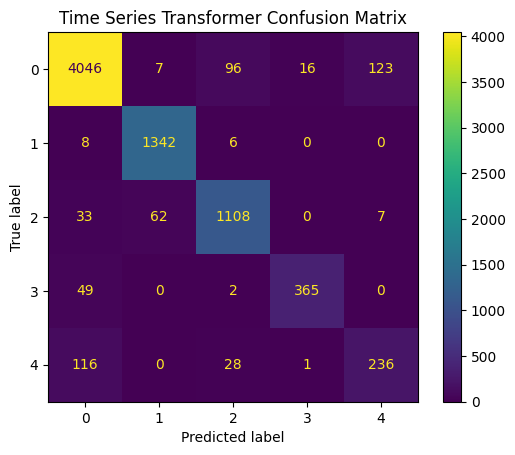

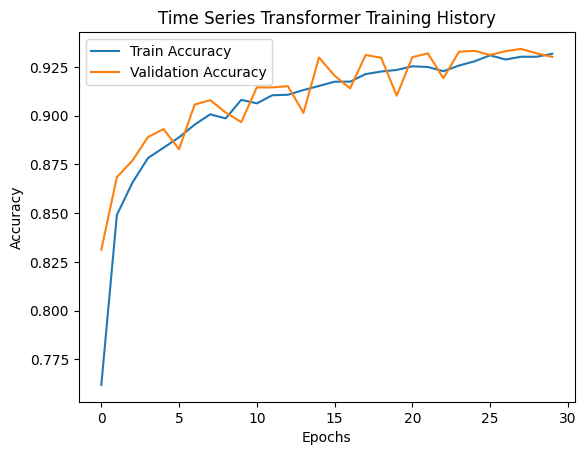

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, Flatten, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the Time Series Transformer Model
def build_tst_model(num_features, num_classes, num_heads=4, ff_dim=64, dropout_rate=0.1):
    # Input layer
    inputs = Input(shape=(1, num_features))  # (timesteps=1, features)

    # Self-Attention Block
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=num_features)(inputs, inputs)
    x = Add()([inputs, attn_output])  # Residual connection
    x = LayerNormalization()(x)

    # Feedforward Block
    x = Dense(ff_dim, activation='relu')(x)
    x = LayerNormalization()(x)
    x = Dropout(dropout_rate)(x)

    # Classification Head
    x = Flatten()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    # Define Model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Reshape Data for TST
timesteps = 1
num_features = X_train_scaled.shape[1]
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], timesteps, num_features)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], timesteps, num_features)

# Convert target to categorical
num_classes = len(np.unique(y_train))
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Build the Model
tst_model = build_tst_model(num_features=num_features, num_classes=num_classes)

# Compile the Model
tst_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = tst_model.fit(
    X_train_reshaped,
    y_train_categorical,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# Evaluate the Model
y_pred_proba = tst_model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_proba, axis=1)

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred)
print(f"TST Accuracy: {accuracy}")
print("TST Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Time Series Transformer Confusion Matrix")
plt.show()

# Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Time Series Transformer Training History')
plt.show()


Random Forest Accuracy: 0.9373938047314077
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      4288
           1       0.99      0.99      0.99      1356
           2       0.99      0.96      0.98      1210
           3       0.98      0.94      0.96       416
           4       0.50      0.51      0.50       381

    accuracy                           0.94      7651
   macro avg       0.88      0.87      0.88      7651
weighted avg       0.94      0.94      0.94      7651



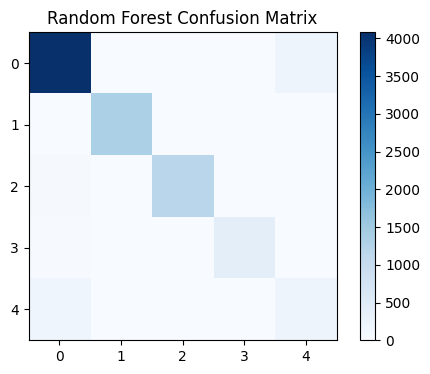

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Train a Random Forest classifier (using the original 2D features)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.title("Random Forest Confusion Matrix")
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.show()


**XGBoost**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:21:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9458894262187949
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      4288
           1       0.98      0.98      0.98      1356
           2       0.96      0.93      0.95      1210
           3       0.96      0.92      0.94       416
           4       0.71      0.58      0.63       381

    accuracy                           0.95      7651
   macro avg       0.91      0.88      0.89      7651
weighted avg       0.94      0.95      0.94      7651



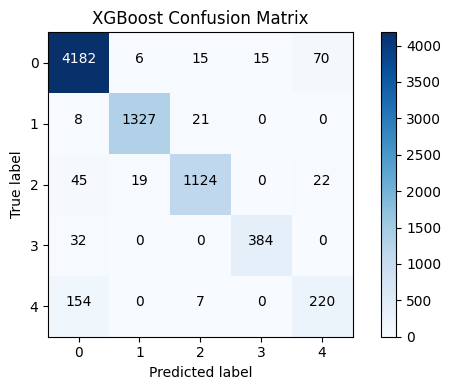

In [ ]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Train an XGBoost classifier (using the original 2D features)
xgb_model = XGBClassifier(n_estimators=100,
                          learning_rate=0.1,
                          random_state=42,
                          use_label_encoder=False,
                          eval_metric='mlogloss')
xgb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix with number annotations on each cell
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.colorbar()

# Set tick marks and labels based on unique class labels in y_test
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Annotate each cell with its numeric value
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


**RNN**

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Reshape data for sequential RNN input (here we use timesteps=1; adjust if you have real sequences)
timesteps = 1
num_features = X_train_scaled.shape[1]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, num_features))
X_test_reshaped  = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, num_features))

num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

# Build a simple RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, input_shape=(timesteps, num_features)))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(num_classes, activation='softmax'))

model_rnn.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train and evaluate
history = model_rnn.fit(X_train_reshaped, y_train_cat,
                        epochs=30, batch_size=32,
                        validation_split=0.2, verbose=1)
score = model_rnn.evaluate(X_test_reshaped, y_test_cat)
print("RNN Test Loss:", score[0], "Test Accuracy:", score[1])


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5353 - loss: 1.1524 - val_accuracy: 0.7244 - val_loss: 0.6841
Epoch 2/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7198 - loss: 0.7114 - val_accuracy: 0.7951 - val_loss: 0.5420
Epoch 3/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7708 - loss: 0.5881 - val_accuracy: 0.8098 - val_loss: 0.4737
Epoch 4/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7919 - loss: 0.5236 - val_accuracy: 0.8379 - val_loss: 0.4174
Epoch 5/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8045 - loss: 0.4962 - val_accuracy: 0.8440 - val_loss: 0.3953
Epoch 6/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8116 - loss: 0.4743 - val_accuracy: 0.8482 - val_loss: 0.3832
Epoch 7/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8218 - loss: 0.4504 - val_accuracy: 0.8587 - val_loss: 0.3613
Epoch 8/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8214 - loss: 0.4420 - val_accuracy: 0.8610 - val_

# **RNN(Simple RNN)**

Epoch 1/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5531 - loss: 1.1169 - val_accuracy: 0.7352 - val_loss: 0.6816
Epoch 2/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7187 - loss: 0.7114 - val_accuracy: 0.7917 - val_loss: 0.5454
Epoch 3/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7546 - loss: 0.6083 - val_accuracy: 0.8203 - val_loss: 0.4636
Epoch 4/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7918 - loss: 0.5296 - val_accuracy: 0.8412 - val_loss: 0.4103
Epoch 5/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8117 - loss: 0.4850 - val_accuracy: 0.8397 - val_loss: 0.4102
Epoch 6/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8105 - loss: 0.4780 - val_accuracy: 0.8510 - val_loss: 0.3728
Epoch 7/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8232 - loss: 0.4473 - val_accuracy: 0.8531 - val_loss: 0.3591
Epoch 8/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8212 - loss: 0.4394 - val_accuracy: 0.

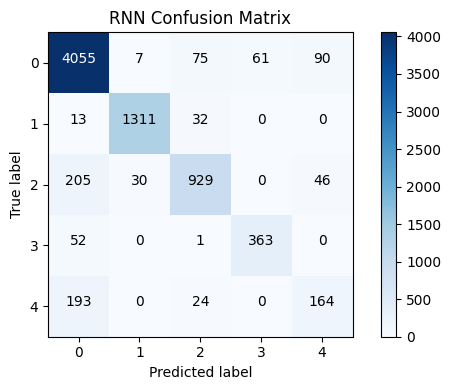

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Reshape data for sequential RNN input (here we use timesteps=1)
timesteps = 1
num_features = X_train_scaled.shape[1]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, num_features))
X_test_reshaped  = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, num_features))

num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

# Build a simple RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, input_shape=(timesteps, num_features)))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(num_classes, activation='softmax'))

model_rnn.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = model_rnn.fit(X_train_reshaped, y_train_cat,
                        epochs=30, batch_size=32,
                        validation_split=0.2, verbose=1)

# Evaluate the model
score = model_rnn.evaluate(X_test_reshaped, y_test_cat)
print("RNN Test Loss:", score[0], "Test Accuracy:", score[1])

# Obtain predictions (convert probabilities to class labels)
y_pred_proba = model_rnn.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_proba, axis=1)

# Print classification report
print("RNN Classification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix with number annotations
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("RNN Confusion Matrix")
plt.colorbar()

# Set tick marks based on unique class labels
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Annotate each cell with its numeric value
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


Attention

Epoch 1/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6219 - loss: 0.9925 - val_accuracy: 0.7989 - val_loss: 0.5236
Epoch 2/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8027 - loss: 0.5107 - val_accuracy: 0.8476 - val_loss: 0.3954
Epoch 3/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8439 - loss: 0.4065 - val_accuracy: 0.8641 - val_loss: 0.3453
Epoch 4/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8536 - loss: 0.3704 - val_accuracy: 0.8763 - val_loss: 0.3110
Epoch 5/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8700 - loss: 0.3279 - val_accuracy: 0.8832 - val_loss: 0.2850
Epoch 6/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8769 - loss: 0.3059 - val_accuracy: 0.8824 - val_loss: 0.2746
Epoch 7/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8824 - loss: 0.2892 - val_accuracy: 0.8946 - val_loss: 0.2517
Epoch 8/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8786 - loss: 0.2911 - val_accuracy: 

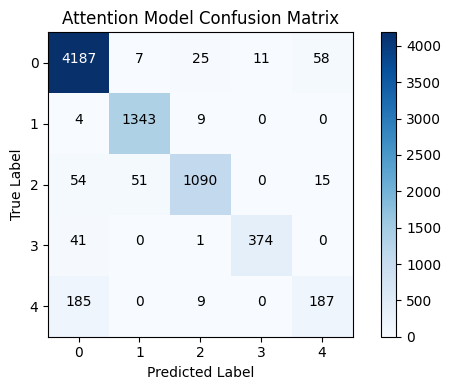

In [ ]:
import numpy as np
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Layer, Input, LSTM, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Custom Attention layer definition
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)
    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight",
                                 shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias",
                                 shape=(input_shape[1],),
                                 initializer="zeros")
        super(Attention, self).build(input_shape)
    def call(self, x):
        score = K.squeeze(K.tanh(K.dot(x, self.W) + self.b), axis=-1)
        attention_weights = K.softmax(score)
        context_vector = K.sum(x * K.expand_dims(attention_weights, axis=-1), axis=1)
        return context_vector

# Reshape data (using timesteps=1; adjust if you have actual sequences)
timesteps = 1
num_features = X_train_scaled.shape[1]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, num_features))
X_test_reshaped  = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, num_features))

num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

# Build the Attention model: LSTM + Attention
inputs = Input(shape=(timesteps, num_features))
x = LSTM(64, return_sequences=True)(inputs)
x = Attention()(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model_attention = Model(inputs=inputs, outputs=outputs)
model_attention.compile(optimizer=Adam(learning_rate=0.001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Train the model
history = model_attention.fit(X_train_reshaped, y_train_cat,
                              epochs=30, batch_size=32,
                              validation_split=0.2, verbose=1)

# Evaluate the model
score = model_attention.evaluate(X_test_reshaped, y_test_cat)
print("Attention Model Test Loss:", score[0], "Test Accuracy:", score[1])

# Obtain predictions
y_pred_proba = model_attention.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_proba, axis=1)

# If y_test is one-hot encoded, convert it back to class labels:
y_true = np.argmax(y_test_cat, axis=1)

# Print the classification report
print("Attention Model Classification Report:\n", classification_report(y_true, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix with number annotations
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Attention Model Confusion Matrix")
plt.colorbar()

# Create tick marks using the unique class labels
classes = np.unique(y_true)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Annotate each cell in the confusion matrix with the count
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


TST

**Hybrid Models**

CNN+GRU

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6072 - loss: 1.0441 - val_accuracy: 0.7974 - val_loss: 0.5266
Epoch 2/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8008 - loss: 0.5181 - val_accuracy: 0.8231 - val_loss: 0.4381
Epoch 3/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8386 - loss: 0.4005 - val_accuracy: 0.8606 - val_loss: 0.3426
Epoch 4/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8609 - loss: 0.3468 - val_accuracy: 0.8722 - val_loss: 0.3211
Epoch 5/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8622 - loss: 0.3351 - val_accuracy: 0.8832 - val_loss: 0.2793
Epoch 6/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8837 - loss: 0.2793 - val_accuracy: 0.8770 - val_loss: 0.2932
Epoch 7/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8885 - loss: 0.2652 - val_accuracy: 0.8923 - val_loss: 0.2795
Epoch 8/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8975 - loss: 0.2440 - val_accuracy: 0.8927 - val_

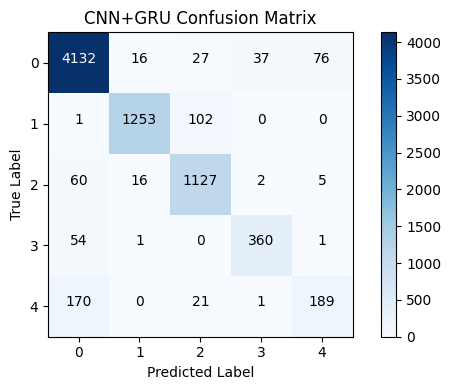

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# --- Data Preparation ---
timesteps = 10
total_features = X_train_scaled.shape[1]
new_features = (total_features // timesteps) * timesteps  # ensure divisibility
X_train_sliced = X_train_scaled[:, :new_features]
X_test_sliced  = X_test_scaled[:, :new_features]
features_per_timestep = new_features // timesteps

X_train_seq = X_train_sliced.reshape((X_train_sliced.shape[0], timesteps, features_per_timestep))
X_test_seq  = X_test_sliced.reshape((X_test_sliced.shape[0], timesteps, features_per_timestep))

num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

# --- Model: CNN + GRU ---
model_cnn_gru = Sequential()
model_cnn_gru.add(Conv1D(filters=64, kernel_size=3, activation='relu',
                         input_shape=(timesteps, features_per_timestep)))
model_cnn_gru.add(MaxPooling1D(pool_size=2))
model_cnn_gru.add(GRU(64))
model_cnn_gru.add(Dropout(0.3))
model_cnn_gru.add(Dense(num_classes, activation='softmax'))

model_cnn_gru.compile(optimizer=Adam(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history = model_cnn_gru.fit(X_train_seq, y_train_cat,
                            epochs=30, batch_size=32,
                            validation_split=0.2, verbose=1)

score = model_cnn_gru.evaluate(X_test_seq, y_test_cat)
print("CNN+GRU Test Loss:", score[0], "Test Accuracy:", score[1])

# --- Evaluation & Confusion Matrix ---
y_pred = np.argmax(model_cnn_gru.predict(X_test_seq), axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("CNN+GRU Classification Report:\n", classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("CNN+GRU Confusion Matrix")
plt.colorbar()
classes = np.unique(y_true)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


CNN + Attention Hybrid

Epoch 1/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5588 - loss: 1.1743 - val_accuracy: 0.6648 - val_loss: 0.8466
Epoch 2/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6706 - loss: 0.8544 - val_accuracy: 0.7391 - val_loss: 0.6787
Epoch 3/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7162 - loss: 0.7307 - val_accuracy: 0.7752 - val_loss: 0.5888
Epoch 4/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7375 - loss: 0.6718 - val_accuracy: 0.7928 - val_loss: 0.5474
Epoch 5/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7625 - loss: 0.6232 - val_accuracy: 0.8071 - val_loss: 0.5161
Epoch 6/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7688 - loss: 0.5963 - val_accuracy: 0.8059 - val_loss: 0.5025
Epoch 7/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7755 - loss: 0.5783 - val_accuracy: 0.8046 - val_loss: 0.4982
Epoch 8/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7845 - loss: 0.5599 - val_accuracy: 0

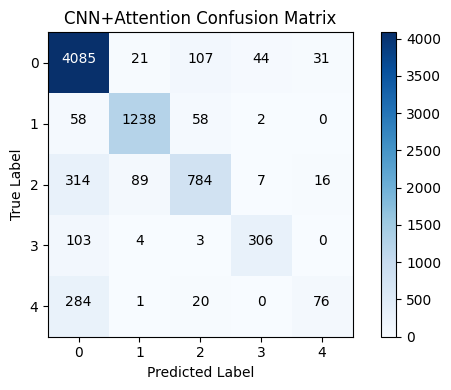

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Conv1D, MaxPooling1D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# --- Custom Attention Layer (Corrected) ---
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        # input_shape: (batch, timesteps, features)
        self.W = self.add_weight(name="att_weight",
                                 shape=(input_shape[-1], 1),
                                 initializer="normal")
        # Use a scalar bias (instead of one per time step)
        self.b = self.add_weight(name="att_bias",
                                 shape=(1,),
                                 initializer="zeros")
        super(Attention, self).build(input_shape)

    def call(self, x):
        # x shape: (batch, timesteps, features)
        # Compute the attention scores
        score = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)  # shape: (batch, timesteps, 1)
        score = tf.keras.backend.squeeze(score, axis=-1)  # shape: (batch, timesteps)
        attention_weights = tf.keras.backend.softmax(score)  # shape: (batch, timesteps)
        # Expand dims to multiply with x and sum over the timesteps
        attention_weights_expanded = tf.keras.backend.expand_dims(attention_weights, axis=-1)  # (batch, timesteps, 1)
        context_vector = tf.keras.backend.sum(x * attention_weights_expanded, axis=1)  # (batch, features)
        return context_vector

# --- Data Preparation ---
# Assume X_train_scaled and X_test_scaled are available (2D arrays) and y_train, y_test are label vectors.
timesteps = 10
total_features = X_train_scaled.shape[1]
# Adjust the number of features so that it's divisible by timesteps
new_features = (total_features // timesteps) * timesteps
X_train_sliced = X_train_scaled[:, :new_features]
X_test_sliced  = X_test_scaled[:, :new_features]
features_per_timestep = new_features // timesteps

# Reshape into 3D tensors for Keras models
X_train_seq = X_train_sliced.reshape((X_train_sliced.shape[0], timesteps, features_per_timestep))
X_test_seq  = X_test_sliced.reshape((X_test_sliced.shape[0], timesteps, features_per_timestep))

num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

# --- Model: CNN + Attention ---
inputs = Input(shape=(timesteps, features_per_timestep))
x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
x = MaxPooling1D(pool_size=2)(x)
x = Attention()(x)  # Custom attention layer now produces a context vector (batch, features)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model_cnn_attention = Model(inputs=inputs, outputs=outputs)
model_cnn_attention.compile(optimizer=Adam(learning_rate=0.001),
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

# --- Train the Model ---
history = model_cnn_attention.fit(X_train_seq, y_train_cat,
                                  epochs=30, batch_size=32,
                                  validation_split=0.2, verbose=1)

# --- Evaluate the Model ---
score = model_cnn_attention.evaluate(X_test_seq, y_test_cat)
print("CNN+Attention Test Loss:", score[0], "Test Accuracy:", score[1])

# --- Predictions & Confusion Matrix ---
y_pred = np.argmax(model_cnn_attention.predict(X_test_seq), axis=1)
y_true = np.argmax(y_test_cat, axis=1)
print("CNN+Attention Classification Report:\n", classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("CNN+Attention Confusion Matrix")
plt.colorbar()
classes = np.unique(y_true)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


LSTM + Attention Hybrid

Epoch 1/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.5885 - loss: 1.0763 - val_accuracy: 0.7765 - val_loss: 0.6020
Epoch 2/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7682 - loss: 0.6035 - val_accuracy: 0.7910 - val_loss: 0.5157
Epoch 3/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7904 - loss: 0.5272 - val_accuracy: 0.8154 - val_loss: 0.4598
Epoch 4/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8046 - loss: 0.4819 - val_accuracy: 0.8115 - val_loss: 0.4577
Epoch 5/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8195 - loss: 0.4414 - val_accuracy: 0.8254 - val_loss: 0.4104
Epoch 6/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8294 - loss: 0.4107 - val_accuracy: 0.8299 - val_loss: 0.3904
Epoch 7/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8379 - loss: 0.3813 - val_accuracy: 0.8539 - val_loss: 0.3571
Epoch 8/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8500 - loss: 0.3570 - val_accura

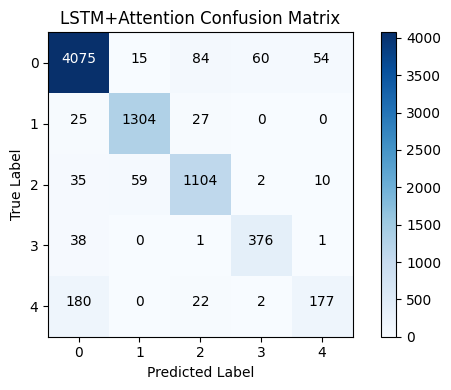

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# --- Custom Attention Layer (Rectified) ---
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)
    def build(self, input_shape):
        # input_shape: (batch, timesteps, features)
        self.W = self.add_weight(name="att_weight",
                                 shape=(input_shape[-1], 1),
                                 initializer="normal")
        # Define a scalar bias instead of one per time step
        self.b = self.add_weight(name="att_bias",
                                 shape=(1,),
                                 initializer="zeros")
        super(Attention, self).build(input_shape)
    def call(self, x):
        # x shape: (batch, timesteps, features)
        score = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)  # shape: (batch, timesteps, 1)
        score = tf.keras.backend.squeeze(score, axis=-1)  # shape: (batch, timesteps)
        attention_weights = tf.keras.backend.softmax(score)  # shape: (batch, timesteps)
        attention_weights_expanded = tf.keras.backend.expand_dims(attention_weights, axis=-1)  # (batch, timesteps, 1)
        context_vector = tf.keras.backend.sum(x * attention_weights_expanded, axis=1)  # (batch, features)
        return context_vector

# --- Data Preparation ---
# Assumes X_train_scaled and X_test_scaled are available (2D arrays)
timesteps = 10
total_features = X_train_scaled.shape[1]
# Adjust number of features so it's divisible by timesteps
new_features = (total_features // timesteps) * timesteps
X_train_sliced = X_train_scaled[:, :new_features]
X_test_sliced  = X_test_scaled[:, :new_features]
features_per_timestep = new_features // timesteps

# Reshape data into 3D tensors: (samples, timesteps, features_per_timestep)
X_train_seq = X_train_sliced.reshape((X_train_sliced.shape[0], timesteps, features_per_timestep))
X_test_seq  = X_test_sliced.reshape((X_test_sliced.shape[0], timesteps, features_per_timestep))

num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

# --- Model: LSTM + Attention ---
inputs = Input(shape=(timesteps, features_per_timestep))
x = LSTM(64, return_sequences=True)(inputs)
x = Attention()(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model_lstm_attention = Model(inputs=inputs, outputs=outputs)

model_lstm_attention.compile(optimizer=Adam(learning_rate=0.001),
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])

history = model_lstm_attention.fit(X_train_seq, y_train_cat,
                                   epochs=30, batch_size=32,
                                   validation_split=0.2, verbose=1)

score = model_lstm_attention.evaluate(X_test_seq, y_test_cat)
print("LSTM+Attention Test Loss:", score[0], "Test Accuracy:", score[1])

# --- Evaluation & Confusion Matrix ---
y_pred = np.argmax(model_lstm_attention.predict(X_test_seq), axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("LSTM+Attention Classification Report:\n", classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("LSTM+Attention Confusion Matrix")
plt.colorbar()

# Set tick marks based on unique class labels
classes = np.unique(y_true)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Annotate each cell with its numeric value
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


Autoencoder + LSTM Hybrid

Epoch 1/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6130 - loss: 1.0421 - val_accuracy: 0.7629 - val_loss: 0.5927
Epoch 2/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7755 - loss: 0.5695 - val_accuracy: 0.8121 - val_loss: 0.4602
Epoch 3/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8138 - loss: 0.4601 - val_accuracy: 0.8312 - val_loss: 0.4293
Epoch 4/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8336 - loss: 0.4040 - val_accuracy: 0.8620 - val_loss: 0.3359
Epoch 5/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8491 - loss: 0.3623 - val_accuracy: 0.8647 - val_loss: 0.3366
Epoch 6/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8654 - loss: 0.3171 - val_accuracy: 0.8742 - val_loss: 0.3145
Epoch 7/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8713 - loss: 0.3086 - val_accuracy: 0.8724 - val_loss: 0.2989
Epoch 8/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8820 - loss: 0.2800 - val_accurac

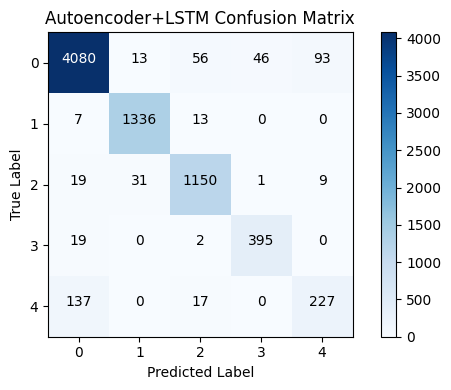

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import TimeDistributed, Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# --- Data Preparation ---
# Assume X_train_scaled, X_test_scaled, y_train, and y_test are already defined.
timesteps = 10
total_features = X_train_scaled.shape[1]
# Adjust the number of features so that it is divisible by timesteps
new_features = (total_features // timesteps) * timesteps
X_train_sliced = X_train_scaled[:, :new_features]
X_test_sliced  = X_test_scaled[:, :new_features]
features_per_timestep = new_features // timesteps

# Reshape the data into 3D tensors (samples, timesteps, features_per_timestep)
X_train_seq = X_train_sliced.reshape((X_train_sliced.shape[0], timesteps, features_per_timestep))
X_test_seq  = X_test_sliced.reshape((X_test_sliced.shape[0], timesteps, features_per_timestep))

# Convert the labels to one-hot encoded format
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

# --- Model: Autoencoder (Encoder Part) + LSTM ---
inputs = Input(shape=(timesteps, features_per_timestep))
# Encoder: compress each time step using a TimeDistributed Dense layer
encoded = TimeDistributed(Dense(32, activation='relu'))(inputs)
# LSTM classifier on the encoded sequence
lstm_out = LSTM(64)(encoded)
drop = Dropout(0.3)(lstm_out)
outputs = Dense(num_classes, activation='softmax')(drop)
model_autoencoder_lstm = Model(inputs=inputs, outputs=outputs)

model_autoencoder_lstm.compile(optimizer=Adam(learning_rate=0.001),
                               loss='categorical_crossentropy',
                               metrics=['accuracy'])

# Train the model for 30 epochs
history = model_autoencoder_lstm.fit(X_train_seq, y_train_cat,
                                     epochs=30, batch_size=32,
                                     validation_split=0.2, verbose=1)

# Evaluate the model on the test set
score = model_autoencoder_lstm.evaluate(X_test_seq, y_test_cat)
print("Autoencoder+LSTM Test Loss:", score[0], "Test Accuracy:", score[1])

# --- Evaluation & Confusion Matrix ---
# Obtain predictions and convert from one-hot to class labels
y_pred = np.argmax(model_autoencoder_lstm.predict(X_test_seq), axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("Autoencoder+LSTM Classification Report:\n", classification_report(y_true, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix with annotated numbers
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Autoencoder+LSTM Confusion Matrix")
plt.colorbar()
classes = np.unique(y_true)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Annotate each cell with its numeric value
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
         plt.text(j, i, format(cm[i, j], 'd'),
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


TCN + LSTM Hybrid

**CNN + Transformer Hybrid**

Epoch 1/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 67s 11ms/step - accuracy: 0.6210 - loss: 1.0003 - val_accuracy: 0.7956 - val_loss: 0.5123
Epoch 2/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7986 - loss: 0.5187 - val_accuracy: 0.8258 - val_loss: 0.4406
Epoch 3/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8298 - loss: 0.4290 - val_accuracy: 0.8317 - val_loss: 0.4093
Epoch 4/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8486 - loss: 0.3811 - val_accuracy: 0.8675 - val_loss: 0.3205
Epoch 5/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8622 - loss: 0.3465 - val_accuracy: 0.8561 - val_loss: 0.3538
Epoch 6/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8720 - loss: 0.3208 - val_accuracy: 0.8662 - val_loss: 0.3195
Epoch 7/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8823 - loss: 0.2849 - val_accuracy: 0.8776 - val_loss: 0.3093
Epoch 8/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8871 - loss: 0.2719 - val_accuracy: 

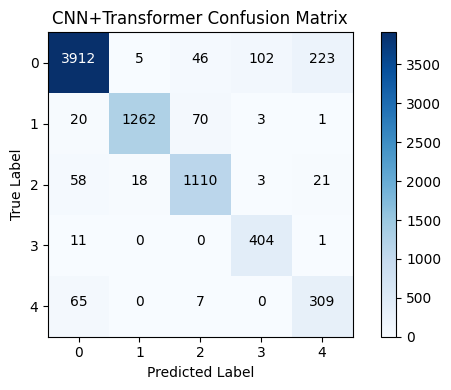

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# --- Transformer Block Definition ---
def transformer_block(x, num_heads, ff_dim, dropout_rate=0.3):
    # Cast the feature dimension explicitly to int
    input_dim = int(x.shape[-1])

    # Multi-head self-attention with explicit key_dim.
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=input_dim)(x, x)
    attn_output = Dropout(dropout_rate)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(Add()([x, attn_output]))

    # Feed-forward network.
    ffn_output = Dense(ff_dim, activation='relu')(out1)
    ffn_output = Dense(input_dim)(ffn_output)
    ffn_output = Dropout(dropout_rate)(ffn_output)
    out2 = LayerNormalization(epsilon=1e-6)(Add()([out1, ffn_output]))
    return out2

# --- Data Preparation ---
# Assumes X_train_scaled, X_test_scaled, y_train, and y_test are defined.
timesteps = 10
total_features = X_train_scaled.shape[1]
# Adjust total features so that it is divisible by timesteps.
new_features = (total_features // timesteps) * timesteps
X_train_sliced = X_train_scaled[:, :new_features]
X_test_sliced  = X_test_scaled[:, :new_features]
features_per_timestep = new_features // timesteps

# Reshape the data into 3D tensors: (samples, timesteps, features_per_timestep)
X_train_seq = X_train_sliced.reshape((X_train_sliced.shape[0], timesteps, features_per_timestep))
X_test_seq  = X_test_sliced.reshape((X_test_sliced.shape[0], timesteps, features_per_timestep))

num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

# --- Model: CNN + Transformer ---
inputs = Input(shape=(timesteps, features_per_timestep))
# CNN feature extractor with padding to maintain the sequence length.
x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
# Apply a transformer block with 2 heads and a feed-forward dimension of 128.
x = transformer_block(x, num_heads=2, ff_dim=128, dropout_rate=0.3)
# Global average pooling to aggregate sequence information.
x = GlobalAveragePooling1D()(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model_cnn_transformer = Model(inputs=inputs, outputs=outputs)

model_cnn_transformer.compile(optimizer=Adam(learning_rate=0.001),
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])

# Train the model for 30 epochs.
history = model_cnn_transformer.fit(X_train_seq, y_train_cat,
                                    epochs=30, batch_size=32,
                                    validation_split=0.2, verbose=1)

# Evaluate the model.
score = model_cnn_transformer.evaluate(X_test_seq, y_test_cat)
print("CNN+Transformer Test Loss:", score[0], "Test Accuracy:", score[1])

# --- Evaluation & Confusion Matrix ---
y_pred = np.argmax(model_cnn_transformer.predict(X_test_seq), axis=1)
y_true = np.argmax(y_test_cat, axis=1)
print("CNN+Transformer Classification Report:\n", classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("CNN+Transformer Confusion Matrix")
plt.colorbar()
classes = np.unique(y_true)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
         plt.text(j, i, format(cm[i, j], 'd'),
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


CNN+LSTM

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Set the number of timesteps for your sequence model
timesteps = 10

# Determine the total number of features and the largest multiple of timesteps
total_features = X_train_scaled.shape[1]
new_features = (total_features // timesteps) * timesteps  # e.g., if total_features=83 and timesteps=10, new_features becomes 80

# Option: Slice the training and test data to only use the first 'new_features' columns
X_train_sliced = X_train_scaled[:, :new_features]
X_test_sliced  = X_test_scaled[:, :new_features]

# Calculate features per timestep
features_per_timestep = new_features // timesteps

# Reshape the data into (samples, timesteps, features_per_timestep)
X_train_seq = X_train_sliced.reshape((X_train_sliced.shape[0], timesteps, features_per_timestep))
X_test_seq  = X_test_sliced.reshape((X_test_sliced.shape[0], timesteps, features_per_timestep))

# Convert the target labels to categorical format
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

# Build the CNN + LSTM model
model_cnn_lstm = Sequential()
model_cnn_lstm.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(timesteps, features_per_timestep)))
model_cnn_lstm.add(MaxPooling1D(pool_size=2))
model_cnn_lstm.add(LSTM(64))
model_cnn_lstm.add(Dropout(0.3))
model_cnn_lstm.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_cnn_lstm.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model
history = model_cnn_lstm.fit(X_train_seq, y_train_cat,
                             epochs=30, batch_size=32,
                             validation_split=0.2, verbose=1)

# Evaluate the model
score = model_cnn_lstm.evaluate(X_test_seq, y_test_cat)
print("CNN+LSTM Test Loss:", score[0], "Test Accuracy:", score[1])


CNN+XGBoost

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set the number of timesteps
timesteps = 10

# Determine total features and adjust (slice) so that total_features is divisible by timesteps
total_features = X_train_scaled.shape[1]
new_features = (total_features // timesteps) * timesteps  # Largest multiple of timesteps less than or equal to total_features

# Slice the data to only use new_features columns
X_train_sliced = X_train_scaled[:, :new_features]
X_test_sliced  = X_test_scaled[:, :new_features]

# Determine features per timestep
features_per_timestep = new_features // timesteps

# Reshape data for CNN: now the shape is (samples, timesteps, features_per_timestep)
X_train_seq = X_train_sliced.reshape((X_train_sliced.shape[0], timesteps, features_per_timestep))
X_test_seq  = X_test_sliced.reshape((X_test_sliced.shape[0], timesteps, features_per_timestep))

# Build a CNN for feature extraction
inputs = Input(shape=(timesteps, features_per_timestep))
x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
feature_layer = Dense(64, activation='relu')(x)
cnn_feature_model = Model(inputs=inputs, outputs=feature_layer)

# (Optional) Pretrain the CNN or simply use it to extract features:
# Here we compile and train the CNN with a dummy target (zeros) for 10 epochs.
cnn_feature_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
cnn_feature_model.fit(X_train_seq,
                      np.zeros((X_train_seq.shape[0], 64)),
                      epochs=10, batch_size=32, verbose=0)

# Extract features from both training and test data
X_train_features = cnn_feature_model.predict(X_train_seq)
X_test_features  = cnn_feature_model.predict(X_test_seq)

# Train XGBoost on the extracted features
xgb_model = XGBClassifier(n_estimators=100,
                          learning_rate=0.1,
                          random_state=42,
                          use_label_encoder=False,
                          eval_metric='mlogloss')
xgb_model.fit(X_train_features, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test_features)

# Calculate and print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print("CNN+XGBoost Hybrid Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
cm_hybrid = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm_hybrid).plot()
plt.title("CNN+XGBoost Hybrid Confusion Matrix")
plt.show()


# CNN+GRU + Xgboost

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# ---------------------------
# Data Preparation
# ---------------------------
# Set the number of timesteps (e.g., 10)
timesteps = 10

# Get total number of features and adjust (slice) so that it's divisible by timesteps
total_features = X_train_scaled.shape[1]
new_features = (total_features // timesteps) * timesteps  # largest multiple of timesteps <= total_features

# Slice the data to only use the first new_features columns
X_train_sliced = X_train_scaled[:, :new_features]
X_test_sliced  = X_test_scaled[:, :new_features]

# Compute features per timestep
features_per_timestep = new_features // timesteps

# Reshape data to 3D: (samples, timesteps, features_per_timestep)
X_train_seq = X_train_sliced.reshape((X_train_sliced.shape[0], timesteps, features_per_timestep))
X_test_seq  = X_test_sliced.reshape((X_test_sliced.shape[0], timesteps, features_per_timestep))

# ---------------------------
# Build the CNN + GRU Feature Extractor
# ---------------------------
inputs = Input(shape=(timesteps, features_per_timestep))
# Convolutional layer to capture local patterns
x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
x = MaxPooling1D(pool_size=2)(x)
# GRU layer to capture temporal dependencies
x = GRU(64, return_sequences=False)(x)
x = Dropout(0.3)(x)
# Dense layer to get a fixed-size feature vector
feature_layer = Dense(64, activation='relu')(x)

# Create the feature extractor model
feature_extractor = Model(inputs=inputs, outputs=feature_layer)

# Pretrain the feature extractor with dummy targets
feature_extractor.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
feature_extractor.fit(X_train_seq,
                      np.zeros((X_train_seq.shape[0], 64)),
                      epochs=10, batch_size=32, verbose=1)

# Extract features from training and test data
X_train_features = feature_extractor.predict(X_train_seq)
X_test_features  = feature_extractor.predict(X_test_seq)

# ---------------------------
# Train XGBoost on Extracted Features
# ---------------------------
xgb_model = XGBClassifier(n_estimators=100,
                          learning_rate=0.1,
                          random_state=42,
                          use_label_encoder=False,
                          eval_metric='mlogloss')
xgb_model.fit(X_train_features, y_train)

# ---------------------------
# Evaluation
# ---------------------------
y_pred = xgb_model.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
print("CNN+GRU+XGBoost Hybrid Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# ---------------------------
# Plot the Confusion Matrix with Annotations
# ---------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("CNN+GRU+XGBoost Hybrid Confusion Matrix")
plt.colorbar()

# Define tick marks based on unique class labels in y_test
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Annotate each cell with its numeric value
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()
